In [50]:
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd
# import seaborn as sns
import os

In [51]:
lst_name = ['fib', 'matmul', 'nqueens']
lst_param = ['45', '40960', '14']

num_para = 0

delta = [1, 2, 3]

name = lst_name[num_para]
param = lst_param[num_para]

In [52]:
itr = 6
# name = 'matmul'
# param = '40960'

# name = 'fib'
# param = '45'

time_FF = []
time_Hclib = []

queue_FF = []
queue_Hclib = []

total_tasks_FF = []
total_tasks_Hclib = []

total_steals_FF = []
total_steals_Hclib = []

# open the text file
for i in range(1, itr+1):
    flag = False
    time_flag = False

    file = open(f'/mnt/hdd2/home/aamleen2022/Original/hclib-iiitd/test/misc/results/{name}_{param}_{i}.txt', 'r')
    for line in file:
        if flag == True:
            queue_Hclib.append(list(map(float, line.split())))
            flag = False
        
        if time_flag == True:
            time_Hclib.append(float(line.split()[0]))
            total_tasks_Hclib.append(int(line.split()[1]))
            total_steals_Hclib.append(int(line.split()[2]))
            time_flag = False
        
        if 'time.kernel' in line:
            time_flag = True
            
        if 'Starting Dumping' in line:
            flag = True
        
    file.close()

all_delta_time = []
all_delta_queue = []
all_delta_steals = []
all_delta_tasks = []

for j in delta:
    time_FF = []
    queue_FF = []
    total_tasks_FF = []
    total_steals_FF = []
    for i in range(1, itr+1):
        flag = False
        time_flag = False
        
        file = open(f'/mnt/hdd2/home/aamleen2022/FenceFree_Deq/test/misc/results/{name}_{param}_{i}_{j}.txt', 'r')
        # extract line having word Total time:
        for line in file:
            if flag == True:
                queue_FF.append(list(map(float, line.split())))

            if time_flag == True:
                time_FF.append(float(line.split()[0]))
                total_tasks_FF.append(int(line.split()[1]))
                total_steals_FF.append(int(line.split()[2]))
                time_flag = False
            
            if 'time.kernel' in line:
                time_flag = True
                
            if 'Starting Dumping' in line:
                flag = True
            
        file.close()
    all_delta_time.append(time_FF)
    all_delta_queue.append(queue_FF)
    all_delta_steals.append(total_steals_FF)
    all_delta_tasks.append(total_tasks_FF)


print(time_FF)
print(all_delta_time)

# for i in range(itr):
#     for j in range(len(queue_FF[i])):
#         queue_FF[i][j] = queue_FF[i][j]/20

#     for j in range(len(queue_Hclib[i])):
#         queue_Hclib[i][j] = queue_Hclib[i][j]/20

for i in range(itr):
    for k in range(len(queue_Hclib[i])):
        queue_Hclib[i][k] = queue_Hclib[i][k]/20

for j in range(len(delta)):
    for i in range(itr):
        for k in range(len(all_delta_queue[j][i])):
            all_delta_queue[j][i][k] = all_delta_queue[j][i][k]/20

    

[20887.623, 21609.235, 21029.074, 20814.69, 21048.571, 21437.075]
[[20702.172, 20939.269, 20905.499, 20870.986, 20861.842, 20941.59], [20887.623, 21609.235, 21029.074, 20814.69, 21048.571, 21437.075]]


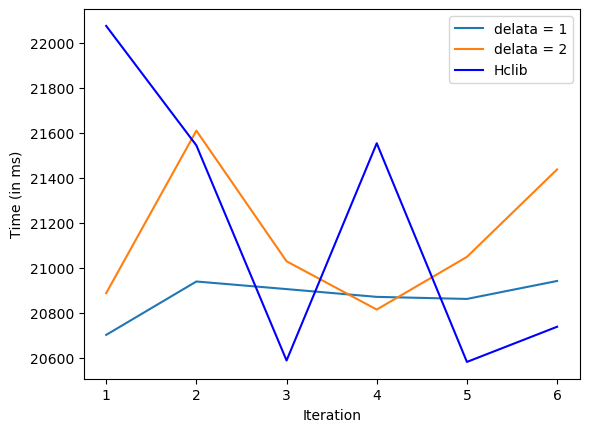

Mean time for FenceFree: 21137.711333333333
Mean time for Hclib: 21180.005999999998


In [53]:
# plot the scatter plot with different colors
for i in range(len(delta)):
    plt.plot(range(1, itr+1), all_delta_time[i], label=f'delata = {delta[i]}')
plt.plot(range(1, itr+1), time_Hclib, color='blue', label='Hclib')
plt.xlabel('Iteration')
plt.ylabel('Time (in ms)')
plt.legend()
plt.show()

mean_ff = np.mean(time_FF)
mean_hclib = np.mean(time_Hclib)

print(f'Mean time for FenceFree: {mean_ff}')
print(f'Mean time for Hclib: {mean_hclib}')

Total tasks: 24.157816 M


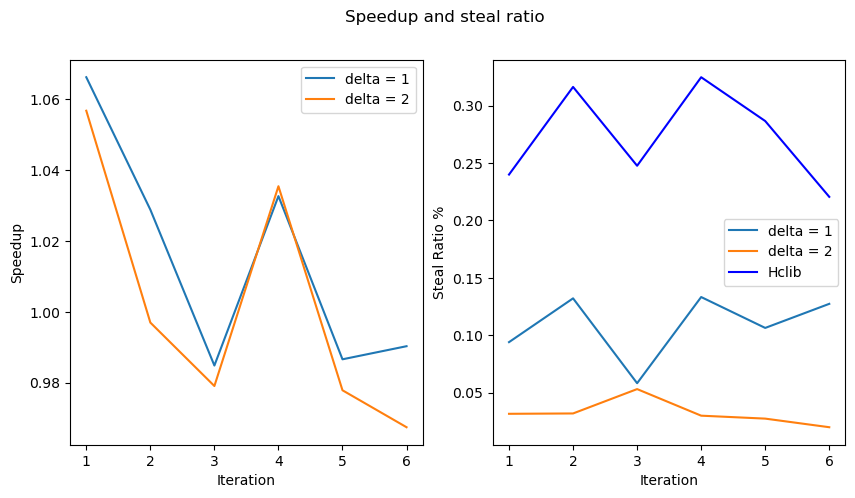

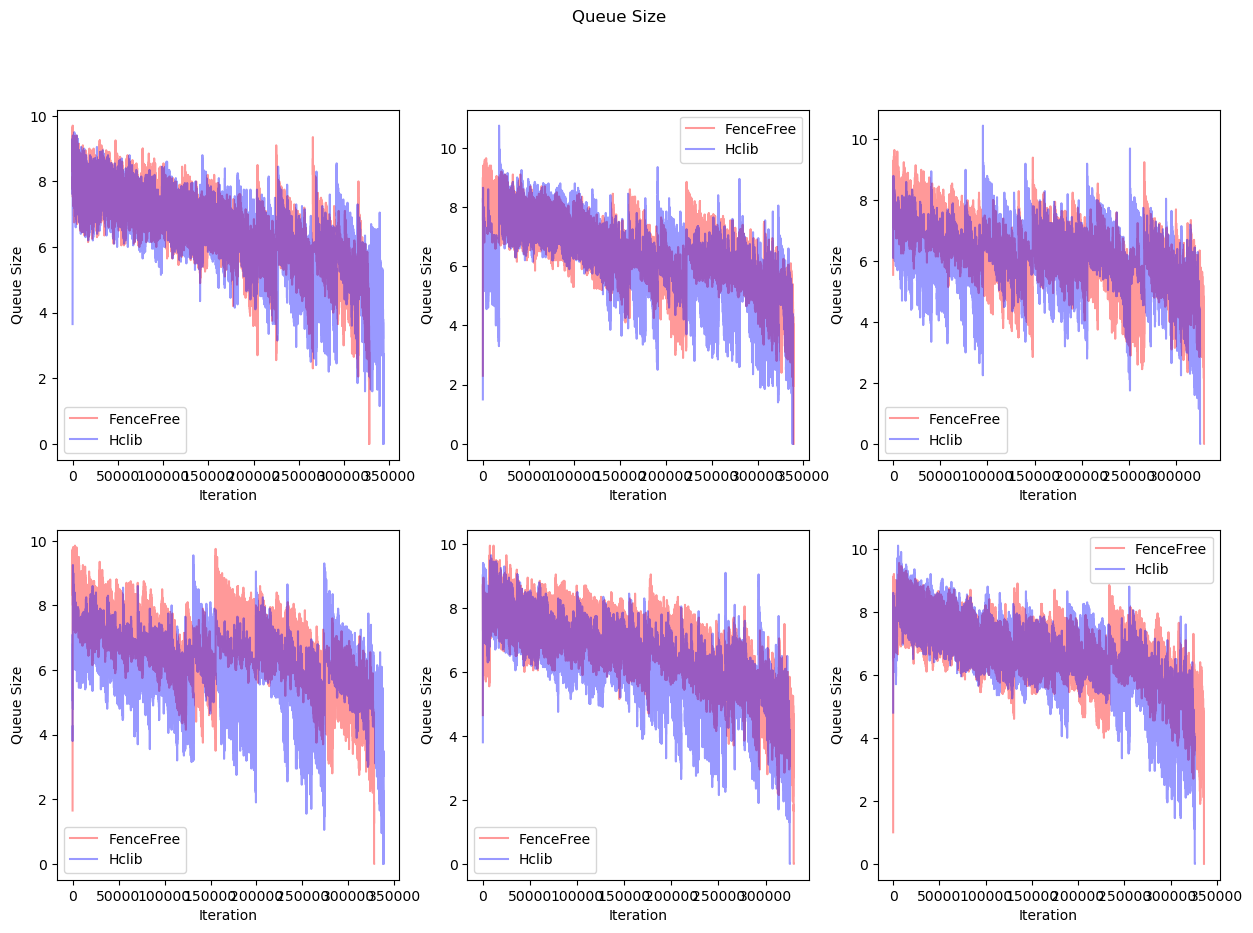

In [54]:


mean_ff = np.mean(time_FF)
mean_hclib = np.mean(time_Hclib)

# print all_tasks
print(f"Total tasks: {total_tasks_Hclib[0]/1000000} M")

# sketch speedup graph

all_delta_speedup = []
for j in range(len(delta)):
    speedup = []
    for i in range(itr):
        speedup.append(time_Hclib[i]/all_delta_time[j][i])
    all_delta_speedup.append(speedup)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Speedup and steal ratio')
for i in range(len(delta)):
    axs[0].plot(range(1, itr+1), all_delta_speedup[i], label=f'delta = {delta[i]}')
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Speedup')
axs[0].legend()


all_delta_steal_ratio = []
steal_ratio_FF = []
for j in range(len(delta)):
    steal_ratio = []
    for i in range(itr):
        steal_ratio.append((all_delta_steals[j][i]/all_delta_tasks[j][i])*100)
    all_delta_steal_ratio.append(steal_ratio)


steal_ratio_Hclib = []
for i in range(itr):
    steal_ratio_Hclib.append((total_steals_Hclib[i]/total_tasks_Hclib[i])*100)

for i in range(len(delta)):
    axs[1].plot(range(1, itr+1), all_delta_steal_ratio[i], label=f'delta = {delta[i]}')
axs[1].plot(range(1, itr+1), steal_ratio_Hclib, color='blue', label='Hclib')
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Steal Ratio %')
axs[1].legend()

plt.show()

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Queue Size')
for i in range(itr):
    axs[i//3, i%3].plot(range(len(queue_FF[i])), queue_FF[i], color='red', label='FenceFree', alpha=0.4)
    axs[i//3, i%3].plot(range(len(queue_Hclib[i])), queue_Hclib[i], color='blue', label='Hclib', alpha=0.4)
    axs[i//3, i%3].set_xlabel('Iteration')
    axs[i//3, i%3].set_ylabel('Queue Size')
    axs[i//3, i%3].legend()

plt.show()